In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adrianmcmahon/imdb-india-movies")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/adrianmcmahon/imdb-india-movies/versions/1


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [51]:
path='/root/.cache/kagglehub/datasets/adrianmcmahon/imdb-india-movies/versions/1/IMDb Movies India.csv'

In [53]:
# Load the dataset
path = '/root/.cache/kagglehub/datasets/adrianmcmahon/imdb-india-movies/versions/1/IMDb Movies India.csv'
df = pd.read_csv(path , encoding='latin 1')

# Print the actual column names for verification
print("Column names:", df.columns)


Column names: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [58]:
# Drop rows with missing target 'Rating'
df = df.dropna(subset=['Rating'])

# Convert 'Votes' to numeric and fill missing values
df['Votes'] = df['Votes'].str.replace(',', '').replace('Unknown', np.nan).astype(float) # Replace commas before conversion
df['Votes'].fillna(df['Votes'].median(), inplace=True)

# Fill other missing values with 'Unknown'
df.fillna('Unknown', inplace=True)

In [59]:
# Extract year from the 'Year' column and convert to numeric
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(float)

# Define categorical features for one-hot encoding
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Separate features and target variable
X = df.drop(['Rating', 'Name'], axis=1)
y = df['Rating']

# Apply one-hot encoding and scaling using ColumnTransformer and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Votes', 'Year']),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


In [60]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4.073414930837107e+22
R-squared: -2.1910150217907684e+22


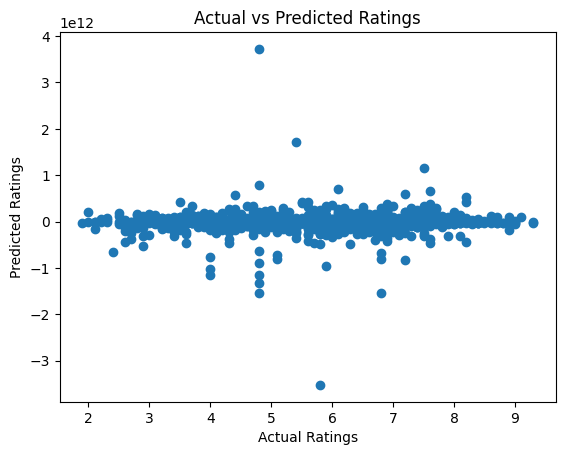

In [62]:
# Plotting the actual vs predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
